# Tarefa 02

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

In [1]:

import plotly.express as px
from plotly import graph_objects
import yfinance as yf


import datetime as dt
import pandas as pd
import numpy as np

#### 1. Carregue os dados da tarefa anterior

In [2]:
df_yahoo = pd.read_csv('./dadosLimpos.csv', header=[0, 1], index_col=[0])
df_yahoo

Price            Close                             High                       \
Ticker       HGRE11.SA  ITSA4.SA   WEGE3.SA   HGRE11.SA  ITSA4.SA   WEGE3.SA   
Date                                                                           
2021-01-04  117.847740  6.580600  34.756058  120.933296  6.745827  35.580476   
2021-01-05  117.235229  6.529325  36.889294  118.227565  6.552116  36.889294   
2021-01-06  116.514214  6.660368  37.867428  117.739130  6.745830  38.878157   
2021-01-07  116.537521  6.928148  39.432434  116.793348  6.962333  39.595454   
2021-01-08  116.405724  6.911056  41.817188  116.979422  7.036401  41.915000   
...                ...       ...        ...         ...       ...        ...   
2021-06-24  102.179657  6.824263  32.138771  102.644808  6.853277  32.204303   
2021-06-25  100.008888  6.661779  31.417925  104.079017  6.830065  32.410265   
2021-06-28  101.133026  6.592144  31.849327  101.543914  6.661780  31.980471   
2021-06-29  102.954910  6.557324  32.505035  103.575123  6.586339  32.664280   
2021-06-30  102.993675  6.470284  31.558924  103.109960  6.551525  32.373894   

Price              Low                             Open                       \
Ticker       HGRE11.SA  ITSA4.SA   WEGE3.SA   HGRE11.SA  ITSA4.SA   WEGE3.SA   
Date                                                                           
2021-01-04  117.839992  6.512230  34.700164  120.933296  6.745827  35.328958   
2021-01-05  116.677039  6.415376  34.467271  117.847682  6.540721  34.770024   
2021-01-06  116.258387  6.500838  36.390922  117.452287  6.529325  36.968484   
2021-01-07  115.901800  6.626181  38.118948  116.677063  6.671761  38.370466   
2021-01-08  115.521924  6.848384  39.520922  116.537529  6.979426  39.567499   
...                ...       ...        ...         ...       ...        ...   
2021-06-24  100.970249  6.731415  31.726853  101.295858  6.847475  32.026428   
2021-06-25   99.388676  6.621159  31.174518  102.334676  6.795247  31.923455   
2021-06-28   97.721875  6.510903  30.772069   99.466216  6.661780  31.437161   
2021-06-29  100.450815  6.499295  31.474614  101.164055  6.568930  31.690069   
2021-06-30  101.474155  6.470284  31.455885  102.334697  6.505102  32.317688   

Price         Volume                      
Ticker     HGRE11.SA  ITSA4.SA  WEGE3.SA  
Date                                      
2021-01-04     40835  50047855   7219800  
2021-01-05     32200  35387872  16633600  
2021-01-06     33682  39637619  21507400  
2021-01-07     31770  51306807  15129600  
2021-01-08     39046  33298484  17381000  
...              ...       ...       ...  
2021-06-24     19751  29453725   9120300  
2021-06-25     50589  65545051   5979000  
2021-06-28     52548  74204263   4461900  
2021-06-29     41099  32050785   7430800  
2021-06-30     18653  35524956   7280200  

[122 rows x 15 columns]

#### 2. Média móvel

1. Faça uma média móvel  em 90 dias dos valores de fechamento ajustados dos ativos que você escolheu
2. Utilizando a fução ```rolling()```, calcule o desvio pardão desses ativos ao longo do tempo, utilizando a mesma janela móvel do item acima
2. Monte um gráfico de linhas para as médias móveis dos ativos da sua base
4. Monte um gráfico de linhas para os desvios padrão em janela móvel
5. Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.

In [4]:
ativos_media_movel = df_yahoo['Close'].rolling(90, min_periods=1).mean()
ativos_media_movel_vertical = ativos_media_movel.stack().reset_index()
ativos_media_movel_vertical.columns = ['data', 'ativo', 'média móvel']

fig = px.line(ativos_media_movel_vertical, x="data", y="média móvel", color='ativo', template='plotly_dark')
fig.show()

In [6]:
ativos_desvio_padrao = df_yahoo['Close'].rolling(90, min_periods=1).std()
ativos_desvio_padrao_vertical = ativos_desvio_padrao.stack().reset_index()
ativos_desvio_padrao_vertical.columns = ['data', 'ativo', 'desvio_padrao']

fig = px.line(ativos_desvio_padrao_vertical, x="data", y="desvio_padrao", color='ativo', template='plotly_dark')
fig.show()

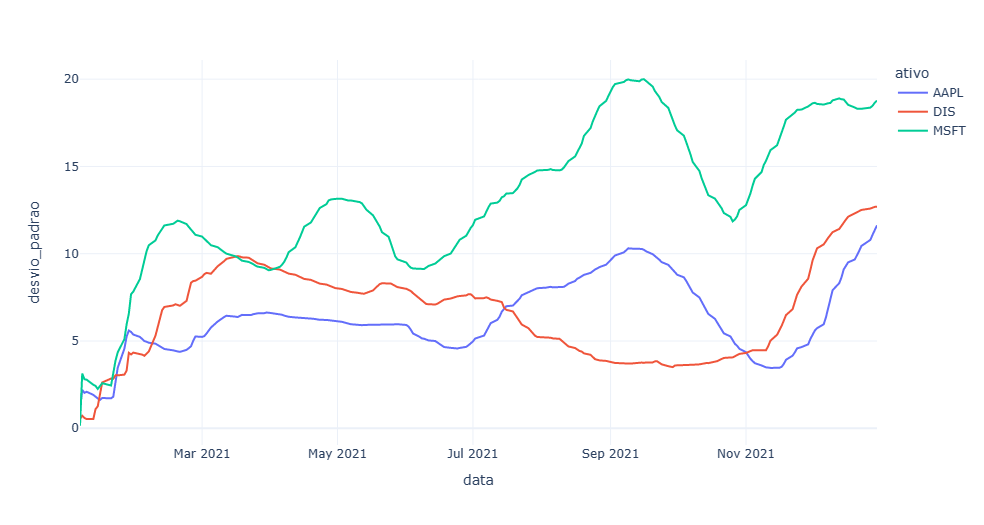

#### 3. Gráfico de *candlestick*
1. Selecione o período dos últimos 60 dias (corridos) para um dos ativos da sua base
2. Monte um gráfico de *candlestick* para esses dados.

In [12]:
lista_indicadores = ['Close', 'High', 'Low', 'Open', 'Volume']
ativo = ['WEGE3.SA']*len(lista_indicadores)
colunas = list(zip(lista_indicadores, ativo))

wege = df_yahoo.loc['01/11/2022':, colunas]
wege.columns = lista_indicadores

wege.head()

,Close,High,Low,Open,Volume
Date,,,,,
2021-01-04,34.756058,35.580476,34.700164,35.328958,7219800
2021-01-05,36.889294,36.889294,34.467271,34.770024,16633600
2021-01-06,37.867428,38.878157,36.390922,36.968484,21507400
2021-01-07,39.432434,39.595454,38.118948,38.370466,15129600
2021-01-08,41.817188,41.915000,39.520922,39.567499,17381000


In [13]:
graph = {
    'x': wege.index,
    'open': wege.Open,
    'close': wege.Close,
    'high': wege.High,
    'low': wege.Low,
    'type': 'candlestick',
    'name': 'WEGE3.SA',
    'showlegend': True
}

In [14]:
grafico = graph_objects.Figure(
    data=[graph],
    layout_title="Índice Microsoft",
    # layout=layout
)
grafico.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
grafico.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

grafico
